# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [2]:
school_vac = read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-25/measles.csv")

school_vac


── Column specification ────────────────────────────────────────────────────────
cols(
  index = col_double(),
  state = col_character(),
  year = col_character(),
  name = col_character(),
  type = col_character(),
  city = col_character(),
  county = col_character(),
  district = col_logical(),
  enroll = col_double(),
  mmr = col_double(),
  overall = col_double(),
  xrel = col_logical(),
  xmed = col_double(),
  xper = col_double(),
  lat = col_double(),
  lng = col_double()
)




index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168
7,Arizona,2018-19,All Aboard Charter,Charter,Phoenix,Maricopa,NA,24,100,-1,NA,NA,4.17,33.52332,-112.1338
8,Arizona,2018-19,Amerischools Academy - Yuma South Campus,Charter,Yuma,Yuma,NA,22,100,-1,NA,NA,NA,32.69001,-114.6234
9,Arizona,2018-19,Arizona Cultural Academy,Private,Phoenix,Maricopa,NA,26,100,-1,NA,NA,NA,33.37562,-111.9929


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [3]:
# create the df_vacc_rates here

df_vacc_rates = school_vac %>%
    filter(mmr >= 0) %>%
    group_by(state) %>%
    summarize(fraction = ((sum(mmr >= 95, na.rm = TRUE))/(n()))) %>% 
    arrange(desc(fraction))

df_vacc_rates

state,fraction
<chr>,<dbl>
Illinois,0.896825397
California,0.888506151
Massachusetts,0.865828092
New York,0.859822073
Pennsylvania,0.834966478
Connecticut,0.811544992
South Dakota,0.742627346
Montana,0.708812261
Vermont,0.683431953


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

## According to the df_vacc_rates table produced above, **Arkansas** has the smallest fraction of schools above the CDC target vaccination rate of 95% of approximately 0.003527337.

**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `row_number`, `mutate`, and `arrange`.

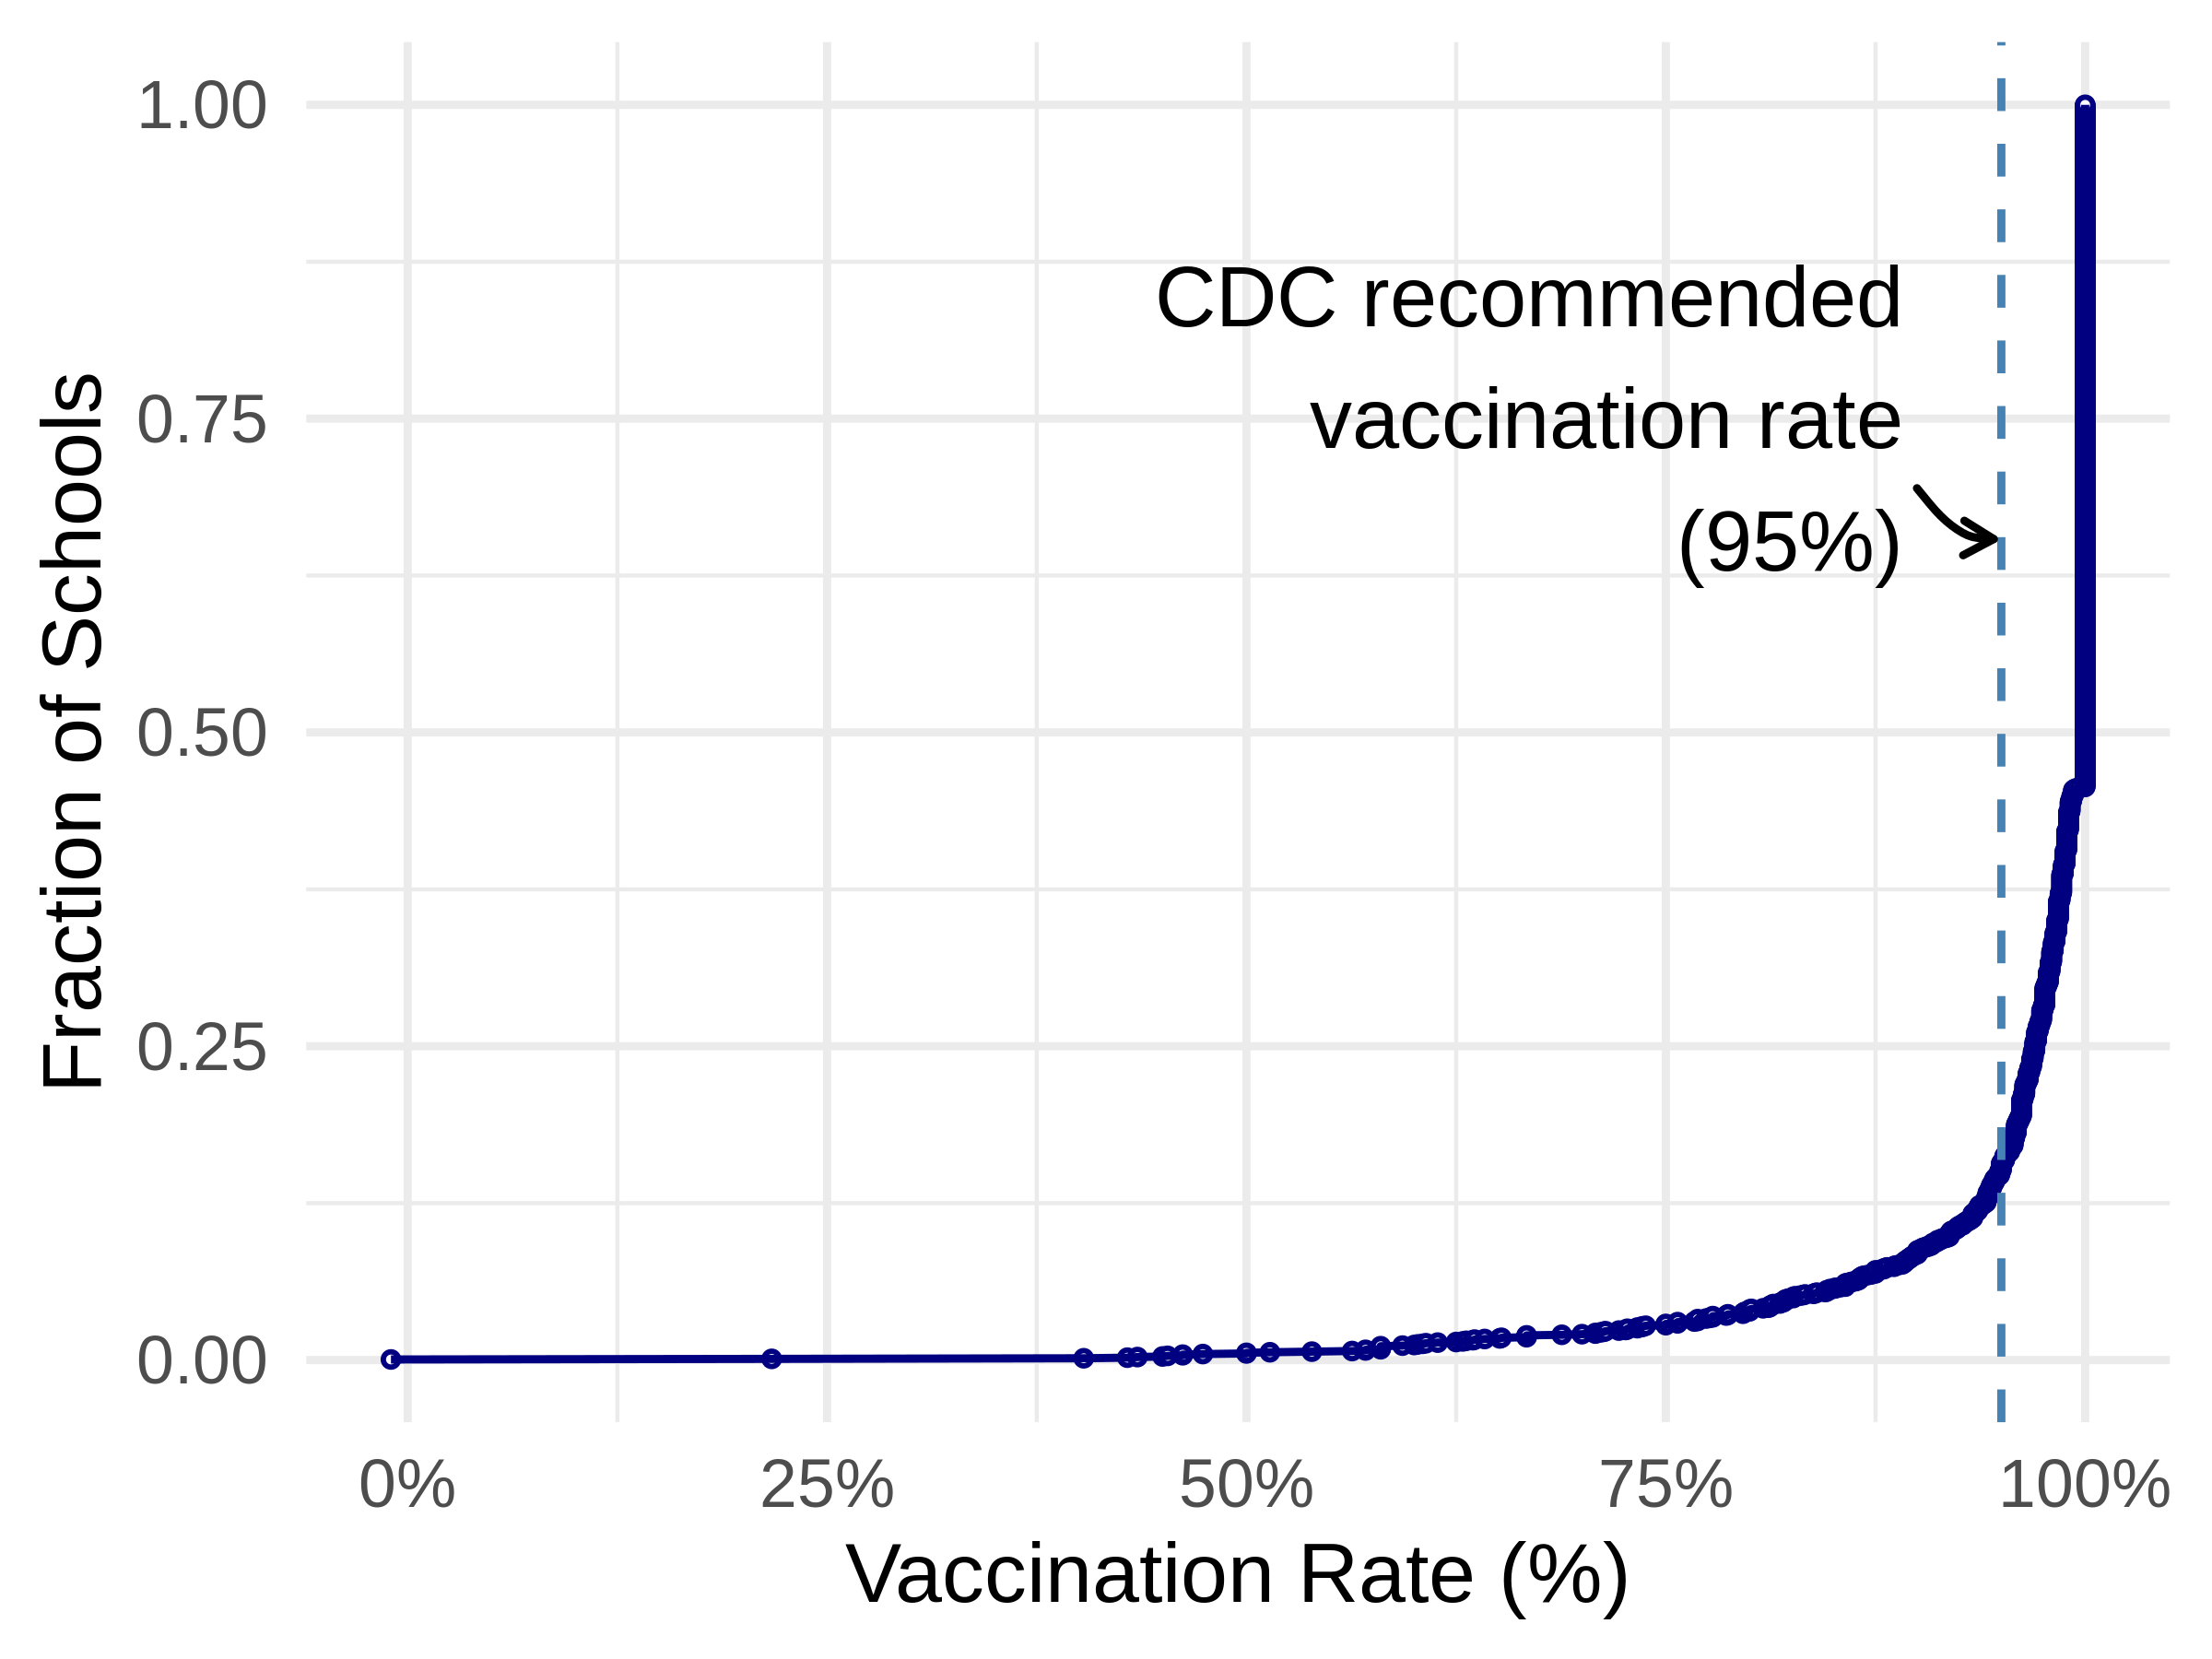

In [4]:
library("ggrepel")

nc_rate = school_vac %>%
    filter(state == "North Carolina") %>%
    arrange(overall)%>%
    mutate(school_frac = row_number()/n())

options(repr.plot.res = 600, repr.plot.width = 4, repr.plot.height = 3)

p = ggplot(nc_rate, aes(x = overall, y=school_frac))

p = p + geom_point(shape = 21, color = "navyblue", fill = "white", size = 0.6)

p = p + geom_line(color = "navyblue")

p = p + geom_vline(xintercept = 95, linetype = "dashed", color = "steelblue")

p = p + ggrepel::geom_text_repel(
    data = data.frame(overall = 95, school_frac = 0.65),
    nudge_x = -7.5,
    nudge_y = 0.10,
    segment.curvature = 0.1,
    label = "CDC recommended\n vaccination rate\n (95%)",
    hjust= "right",
    arrow = arrow(length = unit(0.025, "npc"))
)

p = p + theme_minimal()

p = p + labs(x = "Vaccination Rate (%)", y = "Fraction of Schools")

p = p + scale_x_continuous(labels = scales::percent_format(scale = 1))


p

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

## The median vaccination rate for NC schools is above the the CDC recommended target of 95% as more than 0.5 of NC schools are greater than the 95% rate.